In [266]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import pandas as pd
from importlib import reload
import load_data_london2
reload(load_data_london2)
from load_data_london2 import *

imported


In [ ]:
days = ['2015-05-15', '2015-05-16', '2015-05-17', '2015-05-18', '2015-05-19', '2015-05-20', '2015-05-21', '2015-05-22', '2015-05-23']
#
dfs = []
scaled = []
for day in days:
    file_paths = {
        'f3': 'london_data/'+day+'/f3.csv',
        'f4': 'london_data/'+day+'/f4.csv',
        'f10': 'london_data/'+day+'/f1100.csv',
        'f11': 'london_data/'+day+'/f111.csv',
    }
    df = load_and_preprocess(file_paths)
    dfs.append(df)

df


,flow_f3,flow_f4,flow_f10,flow_f11,target_f3,target_f4,target_f10,target_f11
timestamp,,,,,,,,
2015-05-23 00:00:00,276.0,540.0,1344.0,1116.0,240.0,588.0,936.0,1128.0
2015-05-23 00:05:00,240.0,588.0,936.0,1128.0,240.0,648.0,1272.0,1140.0
2015-05-23 00:10:00,240.0,648.0,1272.0,1140.0,156.0,564.0,1140.0,1128.0
2015-05-23 00:15:00,156.0,564.0,1140.0,1128.0,312.0,432.0,1104.0,1056.0
2015-05-23 00:20:00,312.0,432.0,1104.0,1056.0,192.0,420.0,1140.0,840.0
...,...,...,...,...,...,...,...,...
2015-05-23 23:30:00,156.0,72.0,1392.0,852.0,192.0,36.0,1452.0,936.0
2015-05-23 23:35:00,192.0,36.0,1452.0,936.0,312.0,96.0,1764.0,756.0
2015-05-23 23:40:00,312.0,96.0,1764.0,756.0,144.0,120.0,1608.0,864.0


In [268]:
data = pd.concat(dfs)
data = data.reset_index()
data

,timestamp,flow_f3,flow_f4,flow_f10,flow_f11,target_f3,target_f4,target_f10,target_f11
0,2015-05-15 00:00:00,324.0,492.0,1548.0,1452.0,276.0,408.0,1236.0,1008.0
1,2015-05-15 00:05:00,276.0,408.0,1236.0,1008.0,312.0,432.0,1416.0,1308.0
2,2015-05-15 00:10:00,312.0,432.0,1416.0,1308.0,360.0,408.0,1740.0,1296.0
3,2015-05-15 00:15:00,360.0,408.0,1740.0,1296.0,276.0,504.0,1440.0,1404.0
4,2015-05-15 00:20:00,276.0,504.0,1440.0,1404.0,276.0,420.0,1332.0,1260.0
...,...,...,...,...,...,...,...,...,...
2535,2015-05-23 23:30:00,156.0,72.0,1392.0,852.0,192.0,36.0,1452.0,936.0
2536,2015-05-23 23:35:00,192.0,36.0,1452.0,936.0,312.0,96.0,1764.0,756.0
2537,2015-05-23 23:40:00,312.0,96.0,1764.0,756.0,144.0,120.0,1608.0,864.0
2538,2015-05-23 23:45:00,144.0,120.0,1608.0,864.0,168.0,96.0,1380.0,756.0


In [269]:
train_data, train_dates, test_data, test_dates = train_test_split(data, mor=4, mid=1, eve=5)

train_data_scaled, sc = preprocess_train(train_data)
test_data_scaled = preprocess_test(test_data, sc)

# Define feature and target columns
feature_columns = ['flow_f3', 'flow_f4', 'flow_f10']
target_columns = ['target_f3', 'target_f4', 'target_f10', 'target_f11']

window_size = 12
X_train_original, y_train_original, train_dates_target = create_sliding_windows(train_data, train_dates, window_size, feature_columns, target_columns)
X_train, y_train, train_dates_target = create_sliding_windows(train_data_scaled, train_dates, window_size, feature_columns, target_columns)
X_test_original, y_test_original, test_dates_target = create_sliding_windows(test_data, test_dates, window_size, feature_columns, target_columns)
X_test, y_test, test_dates_target = create_sliding_windows(test_data_scaled, test_dates, window_size, feature_columns, target_columns)
X_train.shape, y_train.shape, train_dates_target.shape, X_test.shape, y_test.shape, test_dates_target.shape

((2241, 12, 3), (2241, 4), (2241,), (275, 12, 3), (275, 4), (275,))

In [270]:
train_dates_target[0]

Timestamp('2015-05-15 01:00:00')

In [271]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
from tensorflow.keras import backend as K

def custom_loss(y_true, y_pred):
    mse_1 = K.mean(K.square(y_true[:, 0] - y_pred[:, 0]))
    mse_2 = K.mean(K.square(y_true[:, 1] - y_pred[:, 1]))
    mse_3 = K.mean(K.square(y_true[:, 2] - y_pred[:, 2]))
    
    sum_constraint = K.mean(K.square(y_pred[:, 1] + (y_pred[:, 2] - y_pred[:, 0] - y_pred[:, 3])))

    loss = mse_1 + mse_2 + mse_3 + sum_constraint

    return loss

def create_model():
    lstm_input = Input(shape=(12, X_train.shape[2]), name='lstm_input')
    inputs = LSTM(200, name='first_layer', return_sequences=True)(lstm_input)
    inputs = Dropout(0.4, name='dropout1')(inputs)
    inputs = LSTM(150, name='first_layer2')(inputs)
    inputs = Dropout(0.4, name='dropout2')(inputs)
    inputs = Dense(100, name='dense_layer3')(inputs)
    inputs = Dense(4, name='dense_layer2')(inputs)
    output = Activation('linear', name='output')(inputs)
    adam = optimizers.Adam(learning_rate=0.01)

    model = Model(inputs=lstm_input, outputs=output)
    model.compile(optimizer=adam, loss=custom_loss)

    return model

best_model = None
best_loss = float('inf')
best_history = None

for i in range(10):
    print(f"Training model {i+1}/5")
    model = create_model()
    
    history = model.fit(X_train, y_train[:, :-1], batch_size=64, epochs=20, shuffle=True, validation_split = 0.1)
    
    test_loss = model.evaluate(X_test, y_test)
    print(f"Model {i+1} Test Loss: {test_loss}")
    
    if test_loss < best_loss:
        best_loss = test_loss
        best_model = model
        best_history = history

if best_model:
    print(f"Best model saved with loss: {best_loss}")
    model = best_model
    history = best_history

#history = model.fit(x=X, y=y, batch_size=64, epochs=10, shuffle=True, validation_split = 0.1)

Training model 1/5
Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 1.5702 - val_loss: 0.0686
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0759 - val_loss: 0.0434
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0563 - val_loss: 0.0312
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0453 - val_loss: 0.0289
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0469 - val_loss: 0.0288
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0425 - val_loss: 0.0302
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0412 - val_loss: 0.0296
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0390 - val_loss: 0.0273
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0421 - val_loss: 0.0331
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0403 - val_loss: 0.0279
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0396 - val_loss: 0.0310
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20

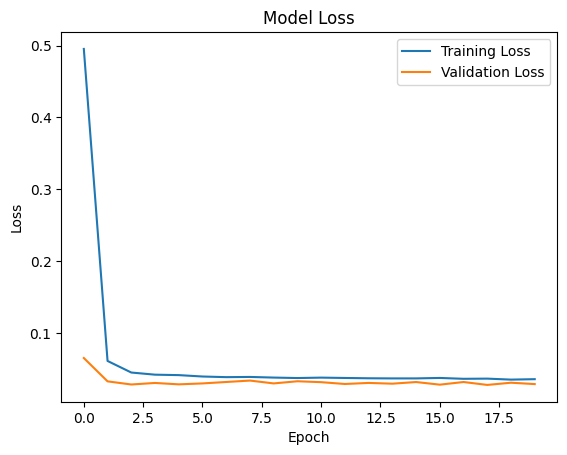

In [272]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [273]:
y_pred = model.predict(X_test)

unknown_original = np.ones((len(y_pred), 8))
unknown_original [:, -1] = y_pred[:, -1].flatten()
unknown_original = sc.inverse_transform(unknown_original)[:, -1]
y_pred_original = np.ones((len(y_pred), 8))
y_pred_original[:, -4] = y_pred[:, 0].flatten()
y_pred_original[:, -3] = y_pred[:, 1].flatten()
y_pred_original[:, -2] = y_pred[:, 2].flatten()


y_pred_original = sc.inverse_transform(y_pred_original)[:, -4:-1]
y_pred_original = np.hstack([y_pred_original, unknown_original.reshape(-1, 1)])
for i in range(10):
    print(y_pred_original[i], y_test_original[i])

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[ 329.99800317  297.95131445 1175.27350616  733.73770845] [ 252.  192. 1056.  720.]
[ 354.16296203  296.97470605 1229.22716832  727.61489403] [ 348.  156. 1128.  888.]
[ 317.23493633  265.2590543  1174.77321839  701.02695644] [ 229.01694  229.62712 1024.88136  844.2712 ]
[ 296.00909853  232.62354791 1149.77091408  666.8069011 ] [ 372.  384. 1224.  804.]
[ 276.17551608  219.37821865 1113.96506023  655.1701237 ] [ 384.  216. 1464. 1044.]
[ 331.18768659  268.88600528 1189.84850979  695.322106  ] [ 397.01694  302.2373  1216.27118  855.05086]
[ 372.01537406  292.60281265 1267.29979277  715.84857166] [ 408.  240. 1320.  948.]
[ 393.87516323  308.91615808 1308.23264122  732.15692174] [ 396.  336. 1464. 1140.]
[ 396.12118851  304.31597292 1331.77727365  735.60422981] [ 432.  240. 1416.  984.]
[ 410.51503851  317.2219348  1380.80999708  764.84063137] [ 408.  372. 1200. 1068.]


In [277]:
from sklearn.metrics import mean_absolute_error

mae_values = [mean_absolute_error(y_test_original[:, i], y_pred_original[:, i]) for i in range(y_test_original.shape[1])]

for i in range(len(mae_values)):
    print(target_columns[i], mae_values[i]/12)

target_f3 5.1948140964116325
target_f4 6.253269340636255
target_f10 11.175270257362046
target_f11 12.706174442844459


In [275]:
mae = mean_absolute_error(y_pred_original, y_test_original)
mae

105.98858441176317

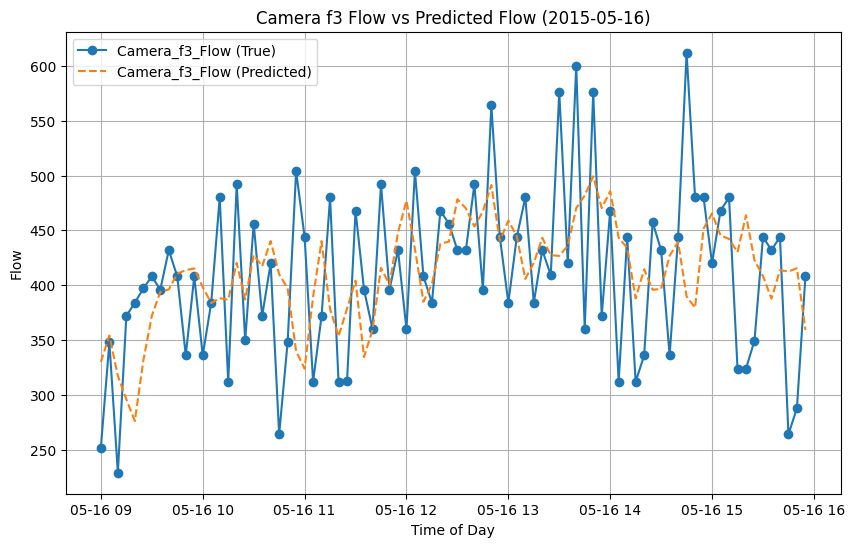

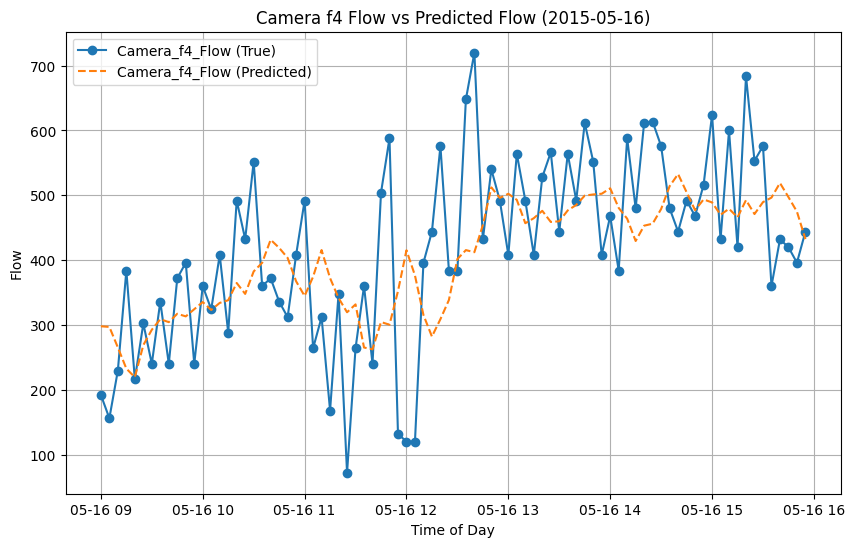

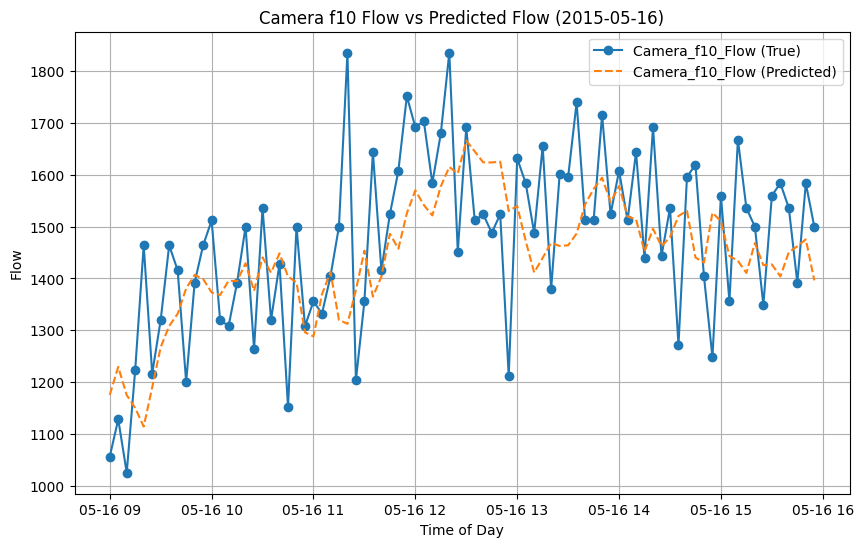

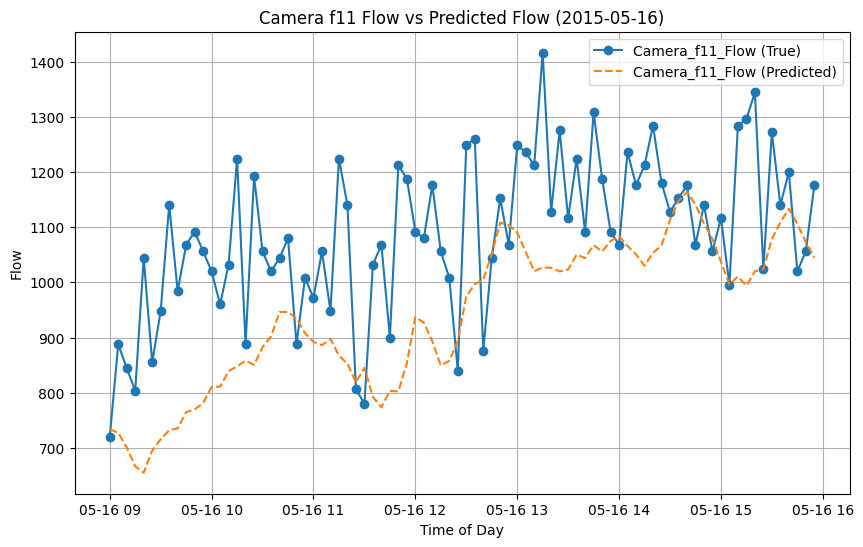

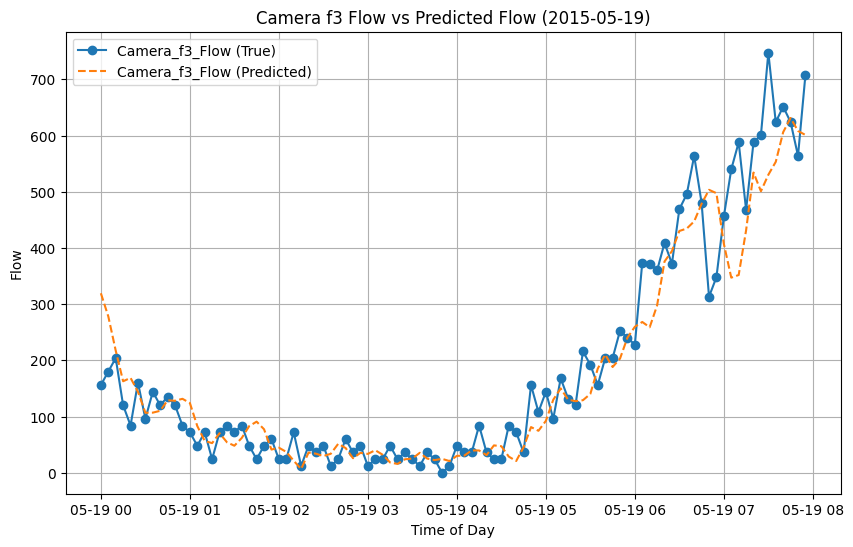

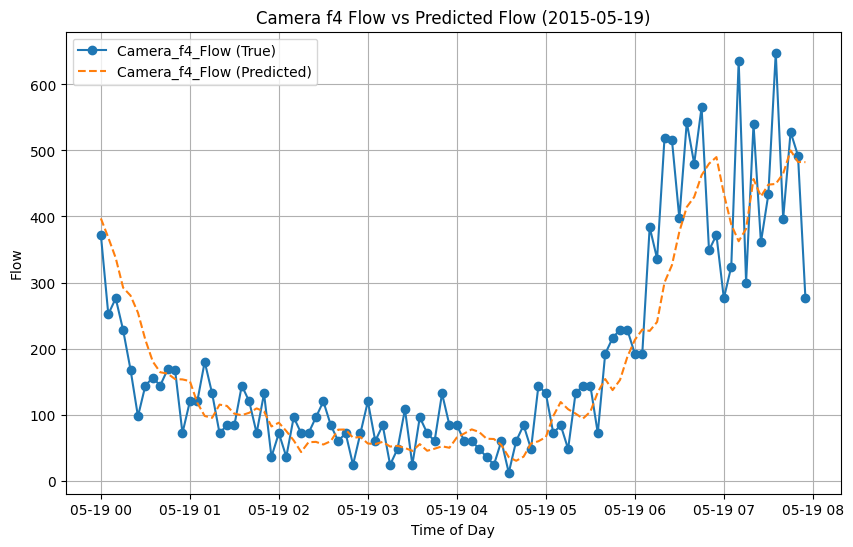

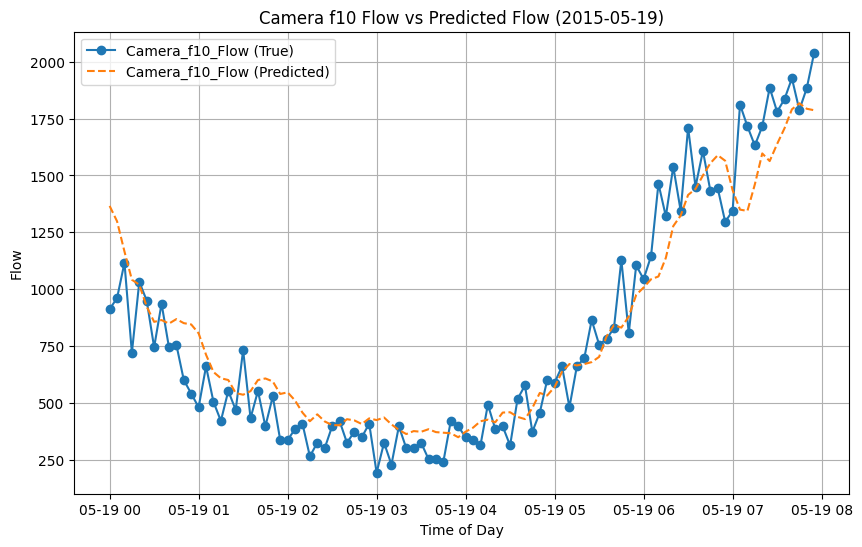

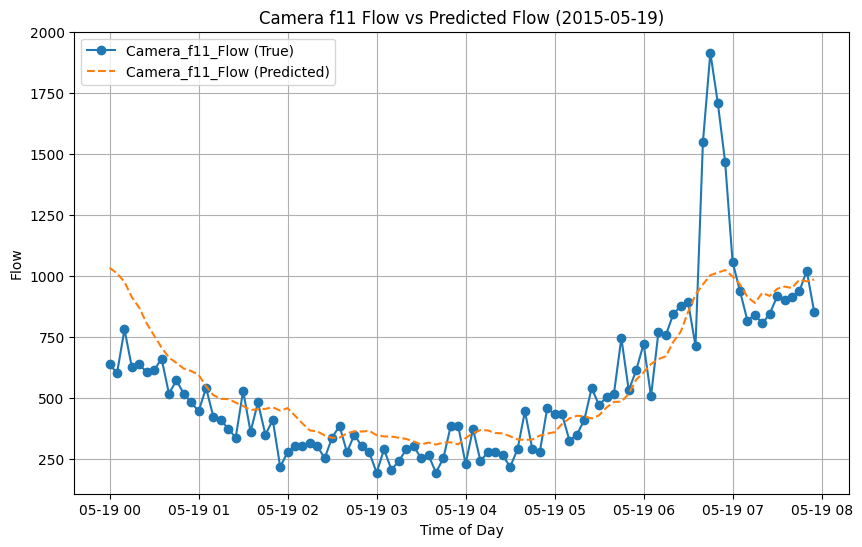

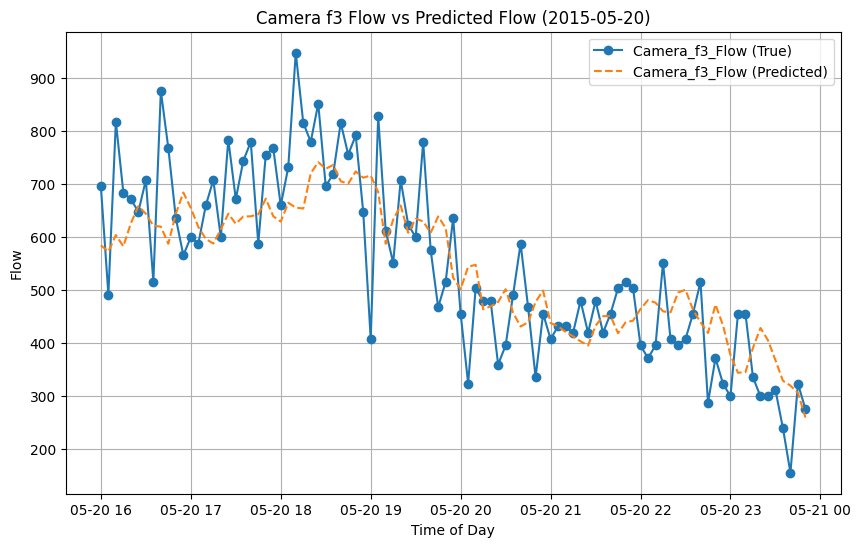

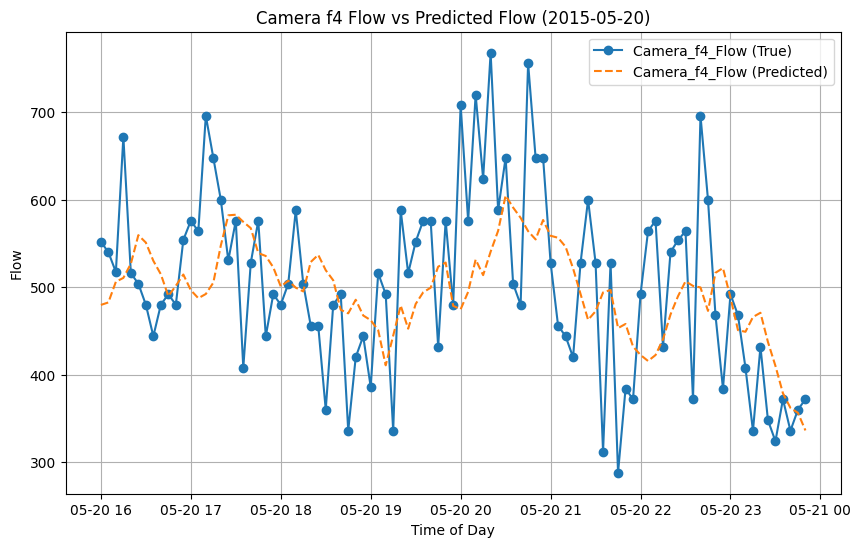

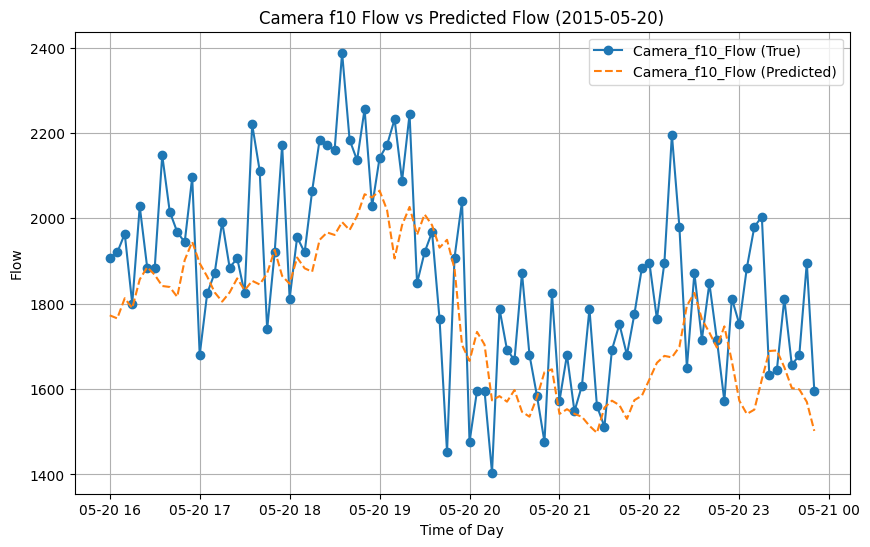

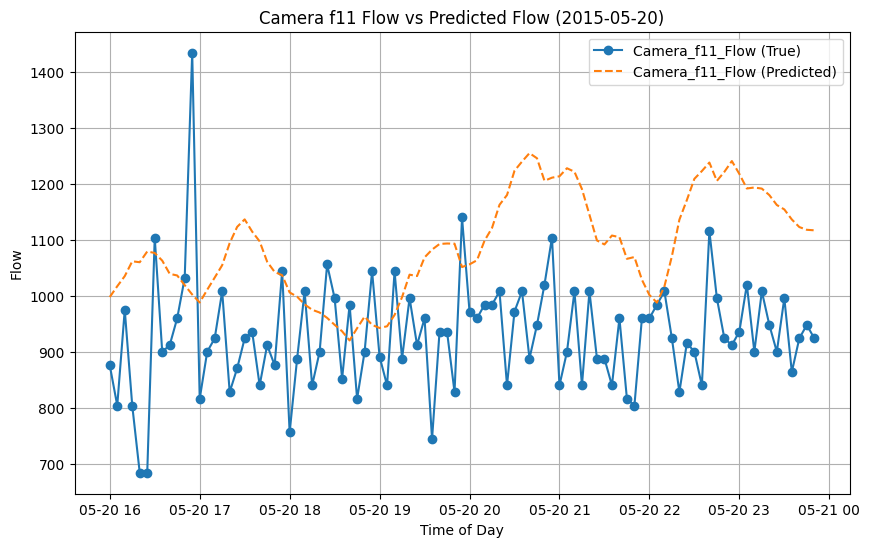

"# Plot each flow and its prediction\nfor camera in ['f3', 'f4', 'f10', 'f11']:\n    plt.figure(figsize=(10, 6))\n    plt.plot(data['Time of Day'], data[f'Camera_{camera}_Flow'], label=f'Camera_{camera}_Flow (True)', linestyle='-', marker='o')\n    plt.plot(data['Time of Day'], data[f'Camera_{camera}_Flow_pred'], label=f'Camera_{camera}_Flow (Predicted)', linestyle='--')\n    plt.title(f'Camera {camera} Flow vs Predicted Flow')\n    plt.xlabel('Time of Day')\n    plt.ylabel('Flow')\n    plt.legend()\n    plt.grid()\n    plt.show()"

In [276]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

data = pd.DataFrame({
    "Time of Day": test_dates_target,
    "Camera_f3_Flow": y_test_original[:, 0],
    "Camera_f4_Flow": y_test_original[:, 1],
    "Camera_f10_Flow": y_test_original[:, 2],
    "Camera_f11_Flow": y_test_original[:, 3],
    "Camera_f3_Flow_pred": y_pred_original[:, 0],
    "Camera_f4_Flow_pred": y_pred_original[:, 1],
    "Camera_f10_Flow_pred": y_pred_original[:, 2],
    "Camera_f11_Flow_pred": y_pred_original[:, 3]
})

data['Day'] = pd.to_datetime(data['Time of Day']).dt.date  # Extract only the date for grouping

# Group data by day
grouped_data = data.groupby('Day')

# Loop through each day and plot for each camera
for day, day_data in grouped_data:
    for camera in ['f3', 'f4', 'f10', 'f11']:
        plt.figure(figsize=(10, 6))
        plt.plot(day_data['Time of Day'], day_data[f'Camera_{camera}_Flow'], label=f'Camera_{camera}_Flow (True)', linestyle='-', marker='o')
        plt.plot(day_data['Time of Day'], day_data[f'Camera_{camera}_Flow_pred'], label=f'Camera_{camera}_Flow (Predicted)', linestyle='--')
        plt.title(f'Camera {camera} Flow vs Predicted Flow ({day})')
        plt.xlabel('Time of Day')
        plt.ylabel('Flow')
        plt.legend()
        plt.grid()
        plt.show()

"""# Plot each flow and its prediction
for camera in ['f3', 'f4', 'f10', 'f11']:
    plt.figure(figsize=(10, 6))
    plt.plot(data['Time of Day'], data[f'Camera_{camera}_Flow'], label=f'Camera_{camera}_Flow (True)', linestyle='-', marker='o')
    plt.plot(data['Time of Day'], data[f'Camera_{camera}_Flow_pred'], label=f'Camera_{camera}_Flow (Predicted)', linestyle='--')
    plt.title(f'Camera {camera} Flow vs Predicted Flow')
    plt.xlabel('Time of Day')
    plt.ylabel('Flow')
    plt.legend()
    plt.grid()
    plt.show()"""